In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# libs for audio
from scipy.io import wavfile as wav
import librosa

# Processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.base import clone
import random

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import utils
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, \
        f1_score, precision_score, recall_score

In [2]:
!pip install resampy

In [3]:
import resampy

In [4]:
librosa.show_versions()

INSTALLED VERSIONS
------------------
python: 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]

librosa: 0.10.1

audioread: 3.0.0
numpy: 1.22.4
scipy: 1.6.2
sklearn: 0.24.1
joblib: 1.0.1
decorator: 5.0.6
numba: 0.53.1
soundfile: 0.12.1
pooch: v1.7.0
soxr: 0.3.6
typing_extensions: installed, no version number available
lazy_loader: installed, no version number available
msgpack: installed, no version number available

numpydoc: 1.1.0
sphinx: 4.0.1
sphinx_rtd_theme: None
matplotlib: 3.3.4
sphinx_multiversion: None
sphinx_gallery: None
mir_eval: None
ipython: None
sphinxcontrib.rsvgconverter: None
pytest: 6.2.3
pytest_mpl: None
pytest_cov: None
samplerate: 0.1.0
resampy: 0.4.2
presets: None
packaging: 20.9


In [5]:
def extract_features_librosa(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40) # 40
    mfccs_processed = np.mean(mfccs.T,axis=0)

    return mfccs_processed

In [6]:
dev_location = "dev_data/"
test_location = "test_data/"
train_location = "train_data/"

google_drive_path ="/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/"

df_dev = pd.read_csv(google_drive_path+'dev_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8')
df_test = pd.read_csv(google_drive_path+'full_test_split.csv',delimiter=',',encoding='utf-8')
df_train = pd.read_csv(google_drive_path+'train_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8')



# df = pd.read_csv("D:/SUTD/ISTD/Term 6/cds/Project/fulltestsplit.csv")
y = df_dev['PHQ8_Binary']
x = df_dev['Participant_ID']


features = []

# Audio files with lots of static
prob = [300, 305, 306, 308, 315, 316, 343, 354, 362, 375, 378, 381, 382, 385, 387, 388, 390, 392, 393, 395, 408, 413, 421, 438, 473, 476, 479, 490, 492]
for index, audio_num in enumerate(x):
    if audio_num not in prob:
        try:
            fn = google_drive_path+dev_location+str(audio_num)+'_AUDIO.wav'
            print(fn)
            features.append([audio_num,extract_features_librosa(fn),y[index]])
        except Exception as e:
            print(e)
        """ librosa_audio, librosa_sample_rate = librosa.load(fn)
        scipy_sample_rate, scipy_audio = wav.read(fn) """

featuresdf = pd.DataFrame(features,columns = ['Participant_ID','feature','PHQ8_Binary'])
featuresdf.to_csv('librosa_mfcc_feature_dev.csv')

/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/dev_data/302_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/dev_data/307_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/dev_data/331_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/dev_data/335_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/dev_data/346_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/dev_data/367_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/dev_data/377_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagr

In [7]:
#get the features of train location files
y = df_train['PHQ8_Binary']
x = df_train['Participant_ID']


features = []


for index, audio_num in enumerate(x):
    if audio_num not in prob:
        try:
            fn = google_drive_path+train_location+str(audio_num)+'_AUDIO.wav'
            print(fn)
            features.append([audio_num,extract_features_librosa(fn),y[index]])
        except Exception as e:
            print(e)
        """ librosa_audio, librosa_sample_rate = librosa.load(fn)
        scipy_sample_rate, scipy_audio = wav.read(fn) """

featuresdf = pd.DataFrame(features,columns = ['Participant_ID','feature','PHQ8_Binary'])
featuresdf.to_csv('librosa_mfcc_feature_train.csv')
#featuresdf.to_csv('librosa_mfcc_feature.csv')

/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/303_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/304_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/310_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/312_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/313_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/317_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/318_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDri

/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/423_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/425_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/426_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/427_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/428_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/429_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/train_data/430_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDri

In [8]:
# to convert X (features) to np array
def remove_brackets(s):
    new_s = s[1:-1]
    return new_s

def str_to_np(X):
    new_X = []
    for i in range(len(X)):
        x_i = np.fromstring(X.iloc[i], dtype=float, sep='\t')
        new_X.append(x_i)
    return np.stack( new_X, axis=0 )

In [10]:
df1 = pd.read_csv("librosa_mfcc_feature_dev.csv")
df2 = pd.read_csv('librosa_mfcc_feature_train.csv')

# Concatenate the dataframes vertically
train_data = pd.concat([df1, df2], axis=0)
print(train_data.shape)

train_data['feature'] = train_data['feature'].apply(remove_brackets)

print(train_data.shape) 
X = train_data['feature']
X_train = str_to_np(X)
#print(X)
y_train= train_data['PHQ8_Binary'].values

(122, 4)
(122, 4)


In [54]:
df_test = pd.read_csv(google_drive_path+'full_test_split.csv',delimiter=',',encoding='utf-8')
df_test = df_test.dropna(subset=['Participant_ID'])
df_test['Participant_ID'] = df_test['Participant_ID'].astype(int).astype(str)
df_test['PHQ8_Binary'] = df_test['PHQ8_Binary'].astype(int).astype(str)

In [55]:
column_types = df_test.dtypes
print(column_types)

Participant_ID     object
PHQ8_Binary        object
PHQ_Score         float64
Gender            float64
dtype: object


In [56]:
df_test.head()

,Participant_ID,PHQ8_Binary,PHQ_Score,Gender
1,300,0,2.0,1.0
3,301,0,3.0,1.0
5,306,0,0.0,0.0
7,308,1,22.0,0.0
9,309,1,15.0,1.0


In [57]:
df_train.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,303,0,0,0,0,0,0.0,0,0,0,0,0
1,304,0,6,0,0,1,1.0,2,2,0,0,0
2,305,0,7,1,0,1,1.0,2,2,1,0,0
3,310,0,4,1,1,1,0.0,0,0,1,1,0
4,312,0,2,1,0,0,1.0,1,0,0,0,0


In [58]:
#get the features of test location files
y = df_test['PHQ8_Binary']
x = df_test['Participant_ID']


features = []


for index, audio_num in enumerate(x):
    if audio_num not in prob:
        try:
            fn = google_drive_path+test_location+str(audio_num)+'_AUDIO.wav'
            print(fn)
            features.append([audio_num,extract_features_librosa(fn),y[index]])
        except Exception as e:
            print(e)
        """ librosa_audio, librosa_sample_rate = librosa.load(fn)
        scipy_sample_rate, scipy_audio = wav.read(fn) """

featuresdf = pd.DataFrame(features,columns = ['Participant_ID','feature','PHQ8_Binary'])
featuresdf.to_csv('librosa_mfcc_feature_test.csv')
#featuresdf.to_csv('librosa_mfcc_feature.csv')

/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/test_data/300_AUDIO.wav
0
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/test_data/301_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/test_data/306_AUDIO.wav
2
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/test_data/308_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/test_data/309_AUDIO.wav
4
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/test_data/311_AUDIO.wav
/Users/nidhigupta/Library/CloudStorage/GoogleDrive-aryanrajagrawal@gmail.com/My Drive/Colab Notebooks/DAIC-WOZ/test_data/314_AUDIO.wav
6
/Users/nidhigupta/Library/CloudStorage/GoogleDr

In [63]:
test_data = pd.read_csv("librosa_mfcc_feature_test.csv")
print(test_data.shape)

test_data['feature'] = test_data['feature'].apply(remove_brackets)

print(test_data.shape) 
X = test_data['feature']
X_test = str_to_np(X)
#print(X)
y_test = test_data['PHQ8_Binary'].values

(23, 4)
(23, 4)


## Evaluate Model on Testing Set

In [62]:
def evaluate_on_test_set(y_test, y_pred):
    print(y_pred)
    print(y_test)
    
    # Calculate AUC
    print("AUC is: ", roc_auc_score(y_test, y_pred))

    # print out recall and precision
    print(classification_report(y_test, y_pred))

    # print out confusion matrix
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    # # calculate points for ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')

In [68]:
def evaluate_model(model):
    model.fit(X_train, y_train)
    #y_pred = model.predict(X_test)
    #evaluate_on_test_set(y_test, y_pred)
    
    y_pred = model.predict(X_train)
    evaluate_on_test_set(y_train, y_pred)
    
    return model

## KCross

In [69]:
RANDOM_STATE = 42

def k_cross(input_model, X=X_train, y=y_train, k=4, n=3, random_state=RANDOM_STATE):
    f1_scores = []
    recall_scores = []
    rkf = RepeatedKFold(n_splits=k, n_repeats=n, random_state=RANDOM_STATE)
        
    for train_index, val_index in rkf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
                
        model = clone(input_model) # prevents incremental fitting
        model.fit(X_train, y_train) 
        
        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)
        recall = recall_score(y_val, y_pred)
        recall_scores.append(recall)
        
    return f1_scores, recall_scores

# Implement Models

### 1. Gausian Naive Bayes

f1 mean score: 0.3451906302331999
recall mean score: 0.3209806397306397
[0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0]
[0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0]
AUC is:  0.5949248120300752
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        84
           1       0.48      0.37      0.42        38

    accuracy                           0.68       122
   macro avg       0.61      0.59      0.60       122
weighted avg       0.66      0.68      0.67       122

Confusion Matrix: 
 [[69 15]
 [24 14]]


GaussianNB()

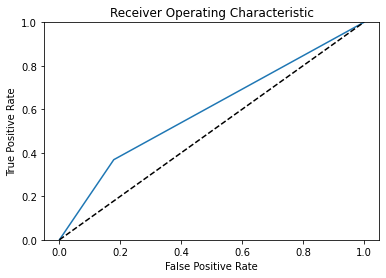

In [70]:
nb_model = GaussianNB()

f1_scores, recall_scores = k_cross(nb_model)

print(f"f1 mean score: {np.mean(f1_scores)}")
print(f"recall mean score: {np.mean(recall_scores)}")

evaluate_model(nb_model)

### 2. Logistic Regression

best scores: f1 = 0.29606885417643936, recall = 0.31230459355459356
[0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0]
AUC is:  0.6879699248120301
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        84
           1       0.74      0.45      0.56        38

    accuracy                           0.78       122
   macro avg       0.76      0.69      0.70       122
weighted avg       0.77      0.78      0.76       122

Confusion Matrix: 
 [[78  6]
 [21 17]]


LogisticRegression(C=1, n_jobs=3)

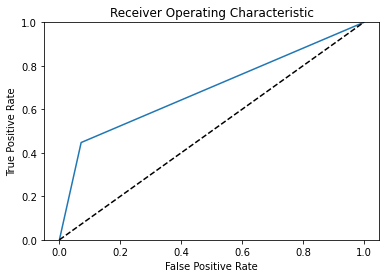

In [71]:
def find_best_logreg_model(power):
    best_f1_model = None
    best_f1 = -1
    best_recall = -1
    
    for i in range(power + 1):
        model = LogisticRegression(n_jobs=3, C=10**i)
        
        f1_scores, recall_scores = k_cross(model)
        f1 = np.mean(f1_scores)
        recall = np.mean(recall_scores)

        if f1 > best_f1:
            best_f1 = f1
            best_recall = recall
            best_f1_model = model
    
    print(f"best scores: f1 = {best_f1}, recall = {best_recall}")
    
    return best_f1_model

best_logreg_f1_model = find_best_logreg_model(6)
evaluate_model(best_logreg_f1_model)

### 3. Decision Tree

best scores: f1 = 0.370011446821078, recall = 0.40493626743626737
[0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0]
AUC is:  0.8314536340852129
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        84
           1       0.87      0.71      0.78        38

    accuracy                           0.88       122
   macro avg       0.88      0.83      0.85       122
weighted avg       0.88      0.88      0.87       122

Confusion Matrix: 
 [[80  4]
 [11 27]]


DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=42)

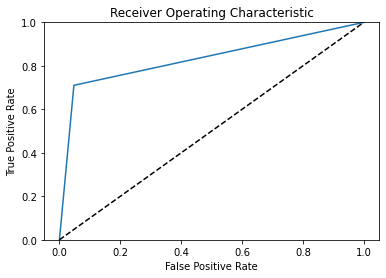

In [73]:
def find_best_tree_model(upper_depth, upper_leaf):
    best_f1_model = None
    best_f1 = -1
    best_recall = -1
    
    for depth in range(1, upper_depth + 1):
        for leaf in range(1, upper_leaf + 1):
            model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth, min_samples_leaf=leaf) 
            
            f1_scores, recall_scores = k_cross(model)
            f1 = np.mean(f1_scores)
            recall = np.mean(recall_scores)
            
            if f1 > best_f1:
                best_f1 = f1
                best_recall = recall
                best_f1_model = model
    
    print(f"best scores: f1 = {best_f1}, recall = {best_recall}")
    
    return best_f1_model

best_tree_f1_model = find_best_tree_model(20, 30)
evaluate_model(best_tree_f1_model)

### 4. Random Forest

best scores: f1 = 0.3493353858081614, recall = 0.3723003848003848
[0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0]
AUC is:  0.9486215538847117
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        84
           1       0.95      0.92      0.93        38

    accuracy                           0.96       122
   macro avg       0.96      0.95      0.95       122
weighted avg       0.96      0.96      0.96       122

Confusion Matrix: 
 [[82  2]
 [ 3 35]]


RandomForestClassifier(n_estimators=5, random_state=42)

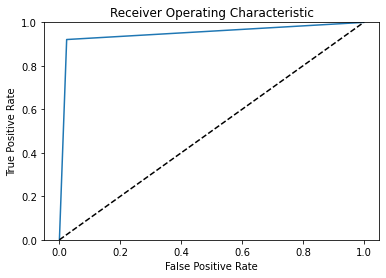

In [74]:
def find_best_forest_model(n_estimators):
    best_f1_model = None
    best_f1 = -1
    best_recall = -1
    
    for estimator in range(1, n_estimators + 1):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=estimator) 
        
        f1_scores, recall_scores = k_cross(model)
        f1 = np.mean(f1_scores)
        recall = np.mean(recall_scores)

        if f1 > best_f1:
            best_f1 = f1
            best_recall = recall
            best_f1_model = model
    
    print(f"best scores: f1 = {best_f1}, recall = {best_recall}")
    
    return best_f1_model

best_forest_f1_model = find_best_forest_model(30)
evaluate_model(best_forest_f1_model)

### 5. SVM with Grid Search

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
f1 mean score: 0.3760240848476142
recall mean score: 0.3936357623857624
Fitting 10 folds for each of 18 candidates, totalling 180 fits
[0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1

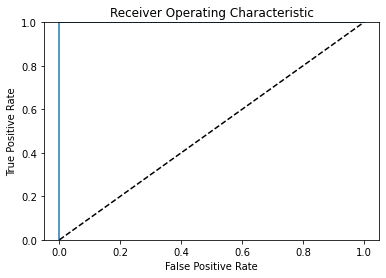

In [76]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100]},
                    {'kernel': ['poly'], 'degree': [3, 4, 5], 'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

svm_model_cv = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring='f1', verbose=1, n_jobs=4)

f1_scores, recall_scores = k_cross(svm_model_cv)

print(f"f1 mean score: {np.mean(f1_scores)}")
print(f"recall mean score: {np.mean(recall_scores)}")

best_svm_model = evaluate_model(svm_model_cv)
print(f"Best SVM parameters: {best_svm_model.best_params_}")

## Save the Model to be used for Depression Detection

In [78]:
import pickle
pickle.dump(best_forest_f1_model, open('python/dd_audio.pkl','wb'))